In [1]:
#All the libraries I need. Note seaborn and Basemap are not in anaconda (Jupyter), and need to be installed.

%matplotlib inline
import pandas as pd #pandas is a useful array/matrix/spreadsheet maipulator. But it has some unique language
import numpy as np #math stuff!
import matplotlib.pyplot as plt #plotting package.
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 7A48-729A

 Directory of C:\Users\KLK\Kaggle Codes\SanFranCrime

05/26/2016  03:25 PM    <DIR>          .
05/26/2016  03:25 PM    <DIR>          ..
05/21/2016  09:11 PM               395 .gitattributes
05/21/2016  09:11 PM               696 .gitignore
05/26/2016  10:24 AM    <DIR>          .ipynb_checkpoints
05/26/2016  03:25 PM           566,746 Data Cleaning.ipynb
05/21/2016  09:46 PM        75,051,678 sampleSubmission.csv
05/24/2016  04:59 PM             2,619 SanFran2575Corr.png
05/24/2016  02:15 PM           135,836 SanFran2575Map.png
05/21/2016  09:43 PM             2,141 SanFranCorr.png
05/26/2016  10:24 AM         1,543,766 SanFranCrime.ipynb
05/21/2016  09:42 PM           145,883 SanFranMap.png
05/21/2016  09:49 PM         7,230,886 sf_map_copyright_openstreetmap_contributors.txt
05/26/2016  10:26 AM         8,235,332 SFcrime.ipynb
05/22/2016  11:50 AM    <DIR>          SFCrimeMapping
05/21/2016  09:46 PM        90,996,

In [3]:
SA_train=pd.read_csv('train.csv', header=0) #Import the training data

In [4]:
#Let's look at just the top crime categories:
pd.value_counts(SA_train['Category'])[0:10]

LARCENY/THEFT     174900
OTHER OFFENSES    126182
NON-CRIMINAL       92304
ASSAULT            76876
DRUG/NARCOTIC      53971
VEHICLE THEFT      53781
VANDALISM          44725
WARRANTS           42214
BURGLARY           36755
SUSPICIOUS OCC     31414
Name: Category, dtype: int64

In [5]:
#To have script run quickly, we'll only use a subset of the training data:
testTrain=SA_train.sample(1000)

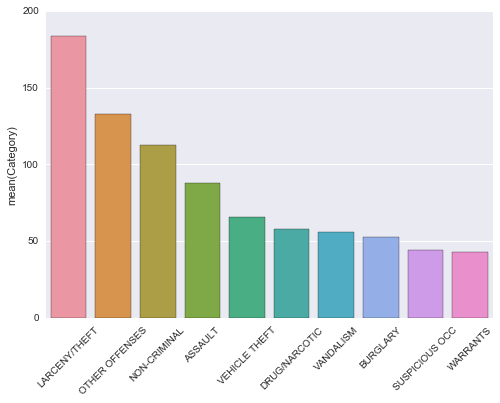

In [6]:
#We can do some pretty mapping of this:
test=testTrain['Category'].value_counts()[0:10]
test2=sns.barplot(x=test.index, y=test)
for item in test2.get_xticklabels():
    item.set_rotation(45)

In [8]:
#Going back to full data for a bit
#The first problem I want to tackle is raw mapping of each crime to a map of the city
SA_train[['X','Y']].describe()

X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000

In [ ]:
#Note from above we can see there are errors in the longitude and latitude data.
#A max of 90 in Y is not mappable. and the max in X is also not in SF.
#We'll deal with that in the future. But for now, I just want to get the data mapped.

In [9]:
#To start, let's just look at the LARCENY/THEFT part
testTHEFT=testTrain[testTrain['Category']=='LARCENY/THEFT']

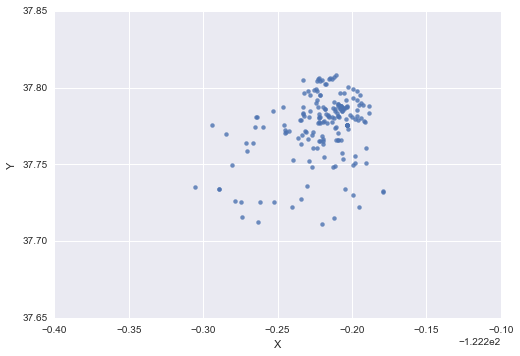

In [10]:
#plotting this, we can start to see the outline of SF:
sns.regplot('X', 'Y', data=testTHEFT, fit_reg=False)

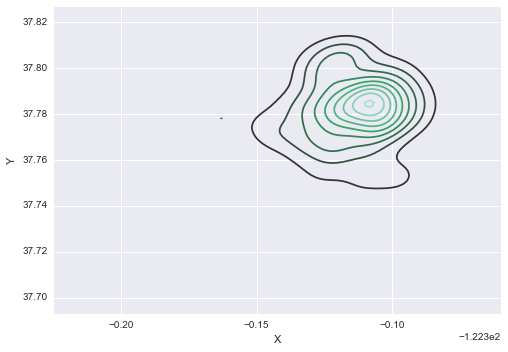

In [11]:
#And make other plots with seaborn that are pretty:
sns.kdeplot(testTHEFT.X, testTHEFT.Y)

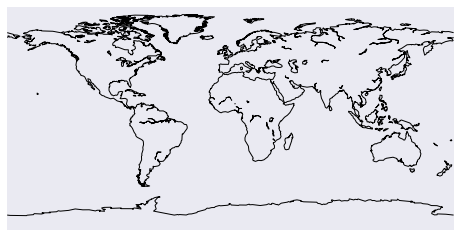

In [12]:
#But we would really like to have a background of SF to make that easier to visualize
#One option is basemap:
map = Basemap()
map.drawcoastlines()
plt.show()

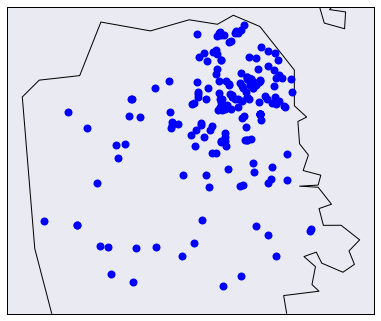

In [13]:
#Here we have SF. the longitude and latitude coordinates of each corner is listed below (llcrnlon, etc)
map = Basemap(projection='merc',
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-122.5226, urcrnrlat=37.8152, urcrnrlon=-122.3496, 
            llcrnrlat=37.7007)
map.drawcoastlines()
#map.drawcountries()
#map.fillcontinents(color = 'coral')
map.drawmapboundary()
lon=testTHEFT['X'].values;
lat=testTHEFT['Y'].values;
x,y = map(lon, lat)
map.plot(x, y, 'bo', markersize=8)

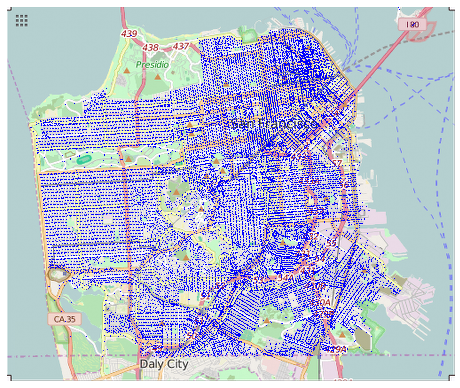

In [14]:
#Here's another way of doing this, importing a png of SF for the background.
#The png was screen grabbed from here: http://www.openstreetmap.org/export#map=12/37.7525/-122.4183
#Latitude and longitude region of png established in Basemap.
lon_lat_box = (-122.45226, -122.3496, 37.7007, 37.8152);

im = plt.imread('SanFranMap.png')
plt.figure(figsize=(8,8))
m = Basemap(llcrnrlon=-122.5226, urcrnrlat=37.8152, urcrnrlon=-122.3496, 
            llcrnrlat=37.7007,
        resolution='h', projection='merc')
m.imshow(im, interpolation='lanczos', origin='upper',extent=lon_lat_box)
lon=SA_train['X'].values; #Note that I've moved back to looking at the full set of data!
lat=SA_train['Y'].values;
x,y = map(lon, lat)
m.plot(x, y, 'bo', markersize=1)
plt.show()

In [27]:
a=testTHEFT.X.values
b=testTHEFT.Y.values

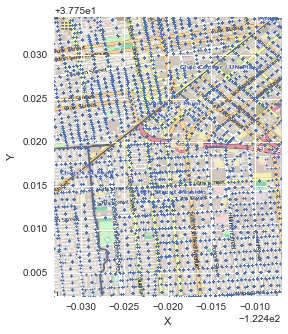

In [17]:
# if you look at SA_train[['X','Y']].describe(), you can see that half the crimes occur in rel small area downtown.
#I take another png with the lon and lat set by the 25% and 75% markers in .describe()
#now I can look in a neighorhood.

im = plt.imread('SanFran2575Map.png')
lon_lat_box = (-122.4330, -122.4070, 37.7524, 37.7844);
plt.figure(figsize=(5*2.08,5))
ax=sns.regplot(x=SA_train.X,y=SA_train.Y,fit_reg=False,scatter_kws={"s":2})
ax.imshow(im,cmap=plt.get_cmap('gray'),extent=lon_lat_box)

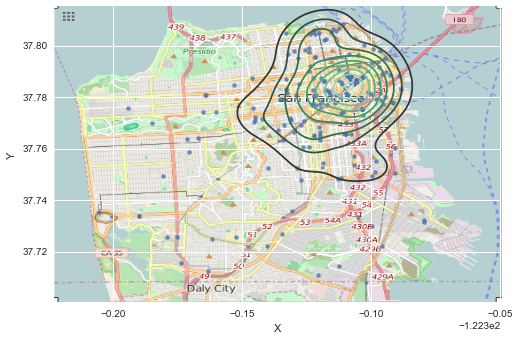

In [18]:
#I can add contour plots. The idea comes from a script from a Kaggle competitor
# https://www.kaggle.com/dbennett/sf-crime/test-map/code
im = plt.imread('SanFranMap.png')

lon_lat_box = (-122.5226, -122.3496, 37.7007, 37.8152);
clipsize = [[-122.5226, -122.3496],[ 37.7007, 37.8152]];

plt.figure(figsize=(8,8))
ax = sns.kdeplot(testTHEFT.X,testTHEFT.Y,clip=clipsize) #contour plot
ax = sns.regplot('X', 'Y', data=testTHEFT, fit_reg=False) #scatter plot
ax.imshow(im,cmap=plt.get_cmap('gray'),extent=lon_lat_box)

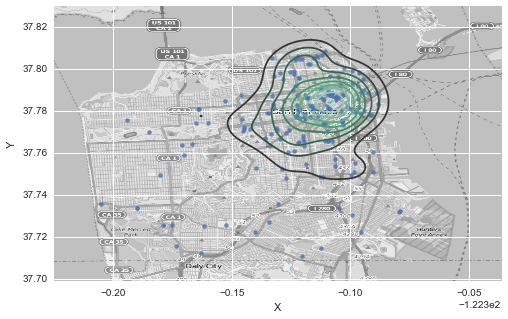

In [19]:
#Using the same method as that compeitor uses a .txt map of San Fran, not a .png
# https://www.kaggle.com/dbennett/sf-crime/test-map/code
mapdata = np.loadtxt("sf_map_copyright_openstreetmap_contributors.txt");
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1];
lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299);
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]];
plt.figure(figsize=(8,8*asp))
ax = sns.kdeplot(testTHEFT.X, testTHEFT.Y, clip=clipsize, aspect=1/asp)
ax=sns.regplot('X', 'Y', data=testTHEFT, fit_reg=False)
ax.imshow(mapdata, cmap=plt.get_cmap('gray'), 
              extent=lon_lat_box, 
              aspect=asp)

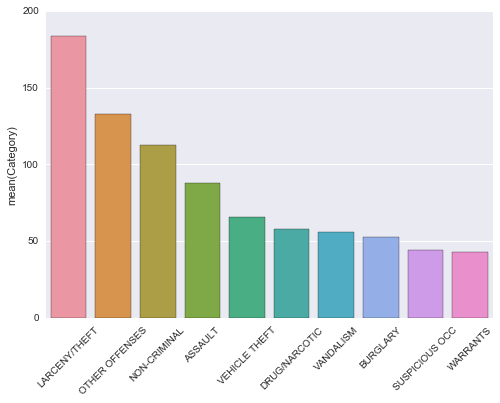

In [20]:
#We can do some pretty plotting of this:
test=testTrain['Category'].value_counts()[0:10]
test2=sns.barplot(x=test.index, y=test)
for item in test2.get_xticklabels():
    item.set_rotation(45)

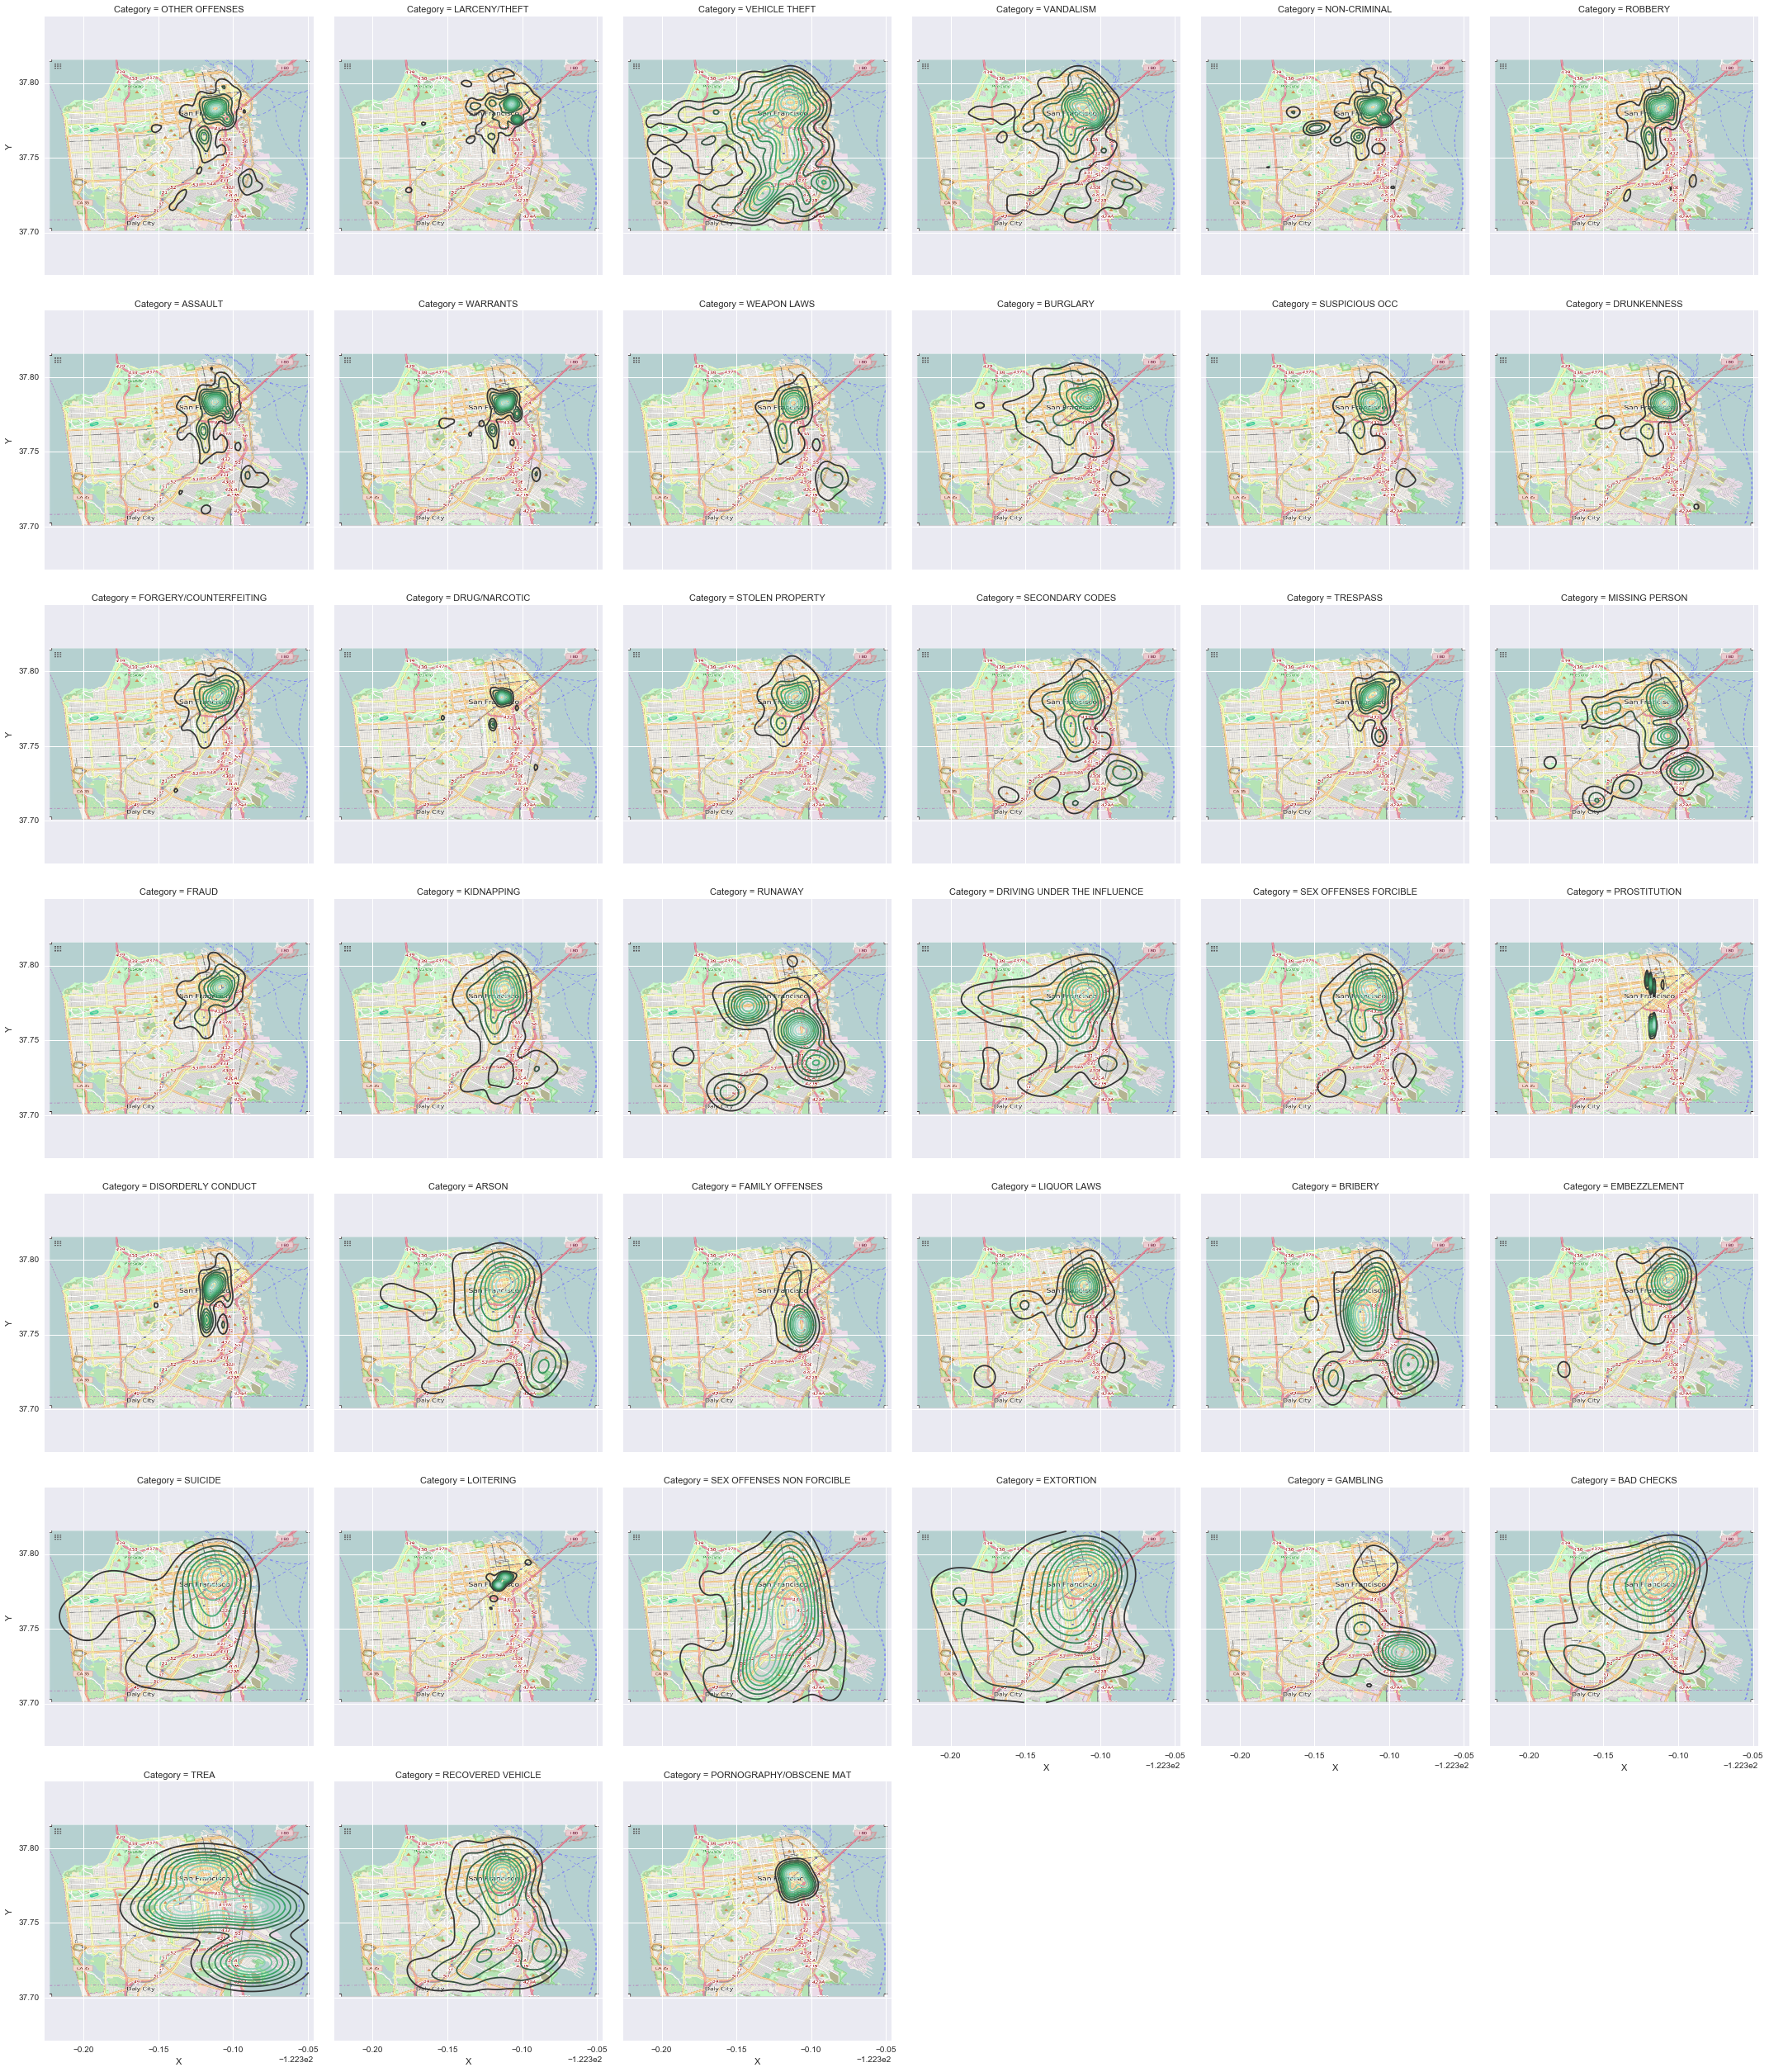

In [33]:
#And use FacetGrid to make plots of everything.
testTrain=SA_train[1:300000]
g= sns.FacetGrid(testTrain, col="Category", col_wrap=6, size=5)
for ax in g.axes:
    ax.imshow(im,cmap=plt.get_cmap('gray'),extent=lon_lat_box)
g.map(sns.kdeplot,'X','Y',clip=clipsize)

In [63]:
pd.value_counts(SA_train['Category'])[0:10]

LARCENY/THEFT     174900
OTHER OFFENSES    126182
NON-CRIMINAL       92304
ASSAULT            76876
DRUG/NARCOTIC      53971
VEHICLE THEFT      53781
VANDALISM          44725
WARRANTS           42214
BURGLARY           36755
SUSPICIOUS OCC     31414
Name: Category, dtype: int64

In [75]:
#OK, that was all fun and dandy. But we still have to deal with the X and Y values that are out of bounds.
#Let's first just see how many there are, using the map's max and min lat and lon:
clipsize = [[-122.5226, -122.3496],[ 37.7007, 37.8152]];

In [107]:
#This code took at bit of time, but showed that there are only a few mistakes in X and Y.
for z in range(0,10):
    x=0;
    y=0;
    for crime in range(97561*z,97561*(z+1)):
        if SA_train.loc[crime,'X']<clipsize[0][0] or SA_train.loc[crime,'X']>clipsize[0][1]:
        #if SA_train.loc[crime,'X']>clipsize[0][0] and SA_train.loc[crime,'X']<clipsize[0][1]:
            x=x+1
        if SA_train.loc[crime,'Y']<clipsize[1][0] or SA_train.loc[crime,'Y']>clipsize[1][1]:
        #if SA_train.loc[crime,'Y']>clipsize[1][0] and SA_train.loc[crime,'Y']<clipsize[1][1]:
            y=y+1
    print (x)
    print(y)
#155 mistakes in Y
#67 mistakes in X

0
7
0
9
0
6
0
13
0
12
0
9
26
41
22
32
19
26


KeyError: 'the label [878049] is not in the [index]'